In [1]:
import pandas as pd; import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
#Setting display format to retina in matplotlib to see better quality images.
from IPython.display import set_matplotlib_formats

# Lines below are just to ignore warnings

In [2]:
from sklearn.datasets import load_iris
iris= load_iris()
print(iris.feature_names)
print(iris.target)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [3]:
# Convert the iris dataset to a pandas dataframe
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Add the target variable to the dataframe
df['target'] = iris.target

# Print the first 5 rows of the dataframe
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [4]:
##Separating features and the target
#Let’s separate features and the target in X and y respectively.
X= df.loc[:, ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
print(X)
Y=df['target']

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [5]:
print(df.shape)
print(df.info())
print(df.target.value_counts())

(150, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None
target
0    50
1    50
2    50
Name: count, dtype: int64


In [6]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=16)

In [7]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(multi_class='ovr')

# fit the model with data
logreg.fit(X_train, y_train)
print(logreg.score(X_train, y_train))
#y_pred = logreg.predict(X_test)
y_pred = logreg.predict(X_test)

0.9553571428571429


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [8]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[13,  0,  0],
       [ 0, 11,  4],
       [ 0,  2,  8]])

Text(0.5, 427.9555555555555, 'Predicted label')

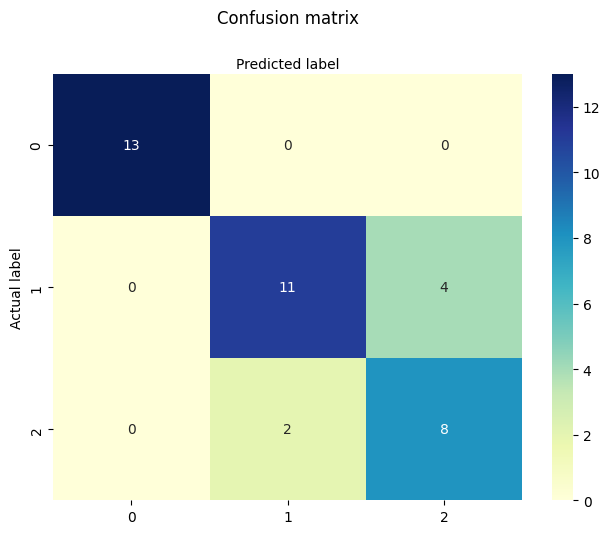

In [9]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [10]:
from sklearn.metrics import classification_report
target_names = ['0', '1','2']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.85      0.73      0.79        15
           2       0.67      0.80      0.73        10

    accuracy                           0.84        38
   macro avg       0.84      0.84      0.84        38
weighted avg       0.85      0.84      0.84        38



In [11]:
logreg.predict_proba(X_test)[:3]

array([[8.61630554e-03, 3.33035415e-01, 6.58348279e-01],
       [9.58421761e-01, 4.15726856e-02, 5.55358738e-06],
       [8.28109799e-03, 3.76269848e-01, 6.15449054e-01]])